In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import glob
import math
import scipy.stats as stats
import scipy

C:\Users\scanimage\AppData\Local\Temp\ipykernel_17568\2801413210.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
data_directory = r"F:\\JJM\\miniscope_analysis\\clustering_analysis\\frame_subset"

In [3]:
#'GRIN034_H16_M13_S22', 'GRIN034_H19_M0_S18', 'GRIN034_H15_M28_S2', 
WT_sessions = ['GRIN013_H13_M33_S54', 'GRIN026_H16_M35_S34', 'GRIN027_H13_M29_S44', 
               'GRIN032_H16_M49_S22', 'GRIN032_H17_M30_S22', 
               'GRIN033_H13_M42_S33', 'GRIN033_H14_M34_S32', 
               'GRIN035_H13_M31_S20', 'GRIN035_H13_M50_S58', 'GRIN035_H14_M40_S34',
               'GRIN039_H12_M26_S54', 'GRIN039_H12_M33_S29', 'GRIN039_H14_M8_S53'] ; 
#'GRIN018_H16_M13_S53'
KO_sessions = ['GRIN009_H13_M59_S14', 'GRIN011_H10_M19_S59', 
               'GRIN012_H16_M57_S23', 'GRIN012_H17_M32_S17', 
               'GRIN018_H17_M41_S43', 'GRIN018_H16_M13_S53',
               'GRIN038_H11_M57_S0', 'GRIN038_H13_M37_S23', 'GRIN038_H15_M39_S40',
               'GRIN041_H12_M54_S49'] ;

## compile and plot genotype data

In [15]:
#compile in dictionaries
#might need to shift matlab pair inidcies due to 1-indexing
jaccard_analysis_by_session = {}
for session in WT_sessions:
    print(session)
    session_output = {}
    for file in glob.glob(data_directory+'/'+session+'*Restbin*normlBinnedCellJaccards.csv'):
        session_output[file.split('_')[-1].strip('.csv')+'_'+file.split('_')[-2]] = pd.read_csv(file, header=None)
    jaccard_analysis_by_session[session] = session_output
    
#compile in dictionaries
#might need to shift matlab pair inidcies due to 1-indexing
jaccard_analysis_by_session_ko = {}
for session in KO_sessions:
    print(session)
    session_output = {}
    for file in glob.glob(data_directory+'/'+session+'*Restbin*normlBinnedCellJaccards.csv'):
        session_output[file.split('_')[-1].strip('.csv')+'_'+file.split('_')[-2]] = pd.read_csv(file, header=None)
    jaccard_analysis_by_session_ko[session] = session_output

GRIN013_H13_M33_S54
GRIN026_H16_M35_S34
GRIN027_H13_M29_S44
GRIN032_H16_M49_S22
GRIN032_H17_M30_S22
GRIN033_H13_M42_S33
GRIN033_H14_M34_S32
GRIN035_H13_M31_S20
GRIN035_H13_M50_S58
GRIN035_H14_M40_S34
GRIN039_H12_M26_S54
GRIN039_H12_M33_S29
GRIN039_H14_M8_S53
GRIN009_H13_M59_S14
GRIN011_H10_M19_S59
GRIN012_H16_M57_S23
GRIN012_H17_M32_S17
GRIN018_H17_M41_S43
GRIN018_H16_M13_S53
GRIN038_H11_M57_S0
GRIN038_H13_M37_S23
GRIN038_H15_M39_S40
GRIN041_H12_M54_S49


In [16]:
jaccard_analysis_by_session_ko

{'GRIN009_H13_M59_S14': {'normlBinnedCellJaccard_Restbin0':         0       1       2       3   4      5       6       7       8
  0  29.842  20.833  17.428  13.595  13  13.29  15.461  17.612  14.544,
  'normlBinnedCellJaccard_Restbin1':         0       1       2       3       4       5     6       7       8
  0  7.0745  5.0582  3.7421  3.2848  3.2472  2.6471  3.27  2.3171  2.4069,
  'normlBinnedCellJaccard_Restbin2':         0       1      2       3       4       5      6       7        8
  0  4.6318  3.2496  2.639  2.2908  1.9111  1.8176  2.091  1.5234  0.94458,
  'normlBinnedCellJaccard_Restbin3':         0       1       2      3       4       5       6       7       8
  0  9.3076  6.2144  4.7211  3.871  3.4682  3.0666  3.9084  4.7538  5.2024},
 'GRIN011_H10_M19_S59': {'normlBinnedCellJaccard_Restbin0':         0       1       2       3       4       5       6       7       8
  0  39.516  29.508  22.696  18.642  16.696  15.046  15.359  17.395  18.351,
  'normlBinnedCellJaccard_Restb

In [17]:
#compile by genotypes
genotype_compiled = pd.concat([pd.concat([jaccard_analysis_by_session[session][v_bin] for v_bin in list(jaccard_analysis_by_session[session].keys())], ignore_index=True) for session in WT_sessions],
          keys=WT_sessions).replace([np.inf, -np.inf], np.nan)
genotype_compiled_ko = pd.concat([pd.concat([jaccard_analysis_by_session[session][v_bin] for v_bin in list(jaccard_analysis_by_session[session].keys())], ignore_index=True) for session in WT_sessions],
          keys=KO_sessions).replace([np.inf, -np.inf], np.nan)

In [18]:
#average multiple sessions per mouse 
#wt: GRIN013, GRIN026, GRIN027, GRIN032, GRIN033, GRIN035, GRIN039, GRIN040, GRIN044, GRIN045  
#ko: GRIN009, GRIN011, GRIN012, GRIN018, GRIN041, GRIN038, GRIN043, GRIN042, 
wt_by_mouse = {}
wt_by_mouse['GRIN013'] = genotype_compiled.loc['GRIN013_H13_M33_S54']
wt_by_mouse['GRIN026'] = genotype_compiled.loc['GRIN026_H16_M35_S34']
wt_by_mouse['GRIN027'] = genotype_compiled.loc['GRIN027_H13_M29_S44']
wt_by_mouse['GRIN032'] = genotype_compiled.loc[['GRIN032_H16_M49_S22','GRIN032_H17_M30_S22']].groupby(level=1).mean()
wt_by_mouse['GRIN033'] = genotype_compiled.loc[['GRIN033_H13_M42_S33','GRIN033_H14_M34_S32', ]].groupby(level=1).mean()
#wt_by_day['GRIN034'] = pd.DataFrame(genotype_compiled.loc[['GRIN034_H16_M13_S22', 'GRIN034_H19_M0_S18', 'GRIN034_H15_M28_S2']].mean(axis=0)).transpose()
wt_by_mouse['GRIN035'] = genotype_compiled.loc[['GRIN035_H13_M31_S20', 'GRIN035_H13_M50_S58', 'GRIN035_H14_M40_S34']].groupby(level=1).mean()
wt_by_mouse['GRIN039'] = genotype_compiled.loc[['GRIN039_H12_M26_S54', 'GRIN039_H12_M33_S29', 'GRIN039_H14_M8_S53']].groupby(level=1).mean()

wt_by_mouse = pd.concat(wt_by_mouse.values(), keys=wt_by_mouse.keys())

#ko 
ko_by_mouse = {}
ko_by_mouse['GRIN009'] = genotype_compiled_ko.loc['GRIN009_H13_M59_S14']
ko_by_mouse['GRIN011'] = genotype_compiled_ko.loc['GRIN011_H10_M19_S59']
ko_by_mouse['GRIN012'] = genotype_compiled_ko.loc[['GRIN012_H16_M57_S23', 'GRIN012_H17_M32_S17']].groupby(level=1).mean() 
ko_by_mouse['GRIN018'] = genotype_compiled_ko.loc[['GRIN018_H17_M41_S43', 'GRIN018_H16_M13_S53' ]].groupby(level=1).mean() 
ko_by_mouse['GRIN038'] = genotype_compiled_ko.loc[['GRIN038_H11_M57_S0', 'GRIN038_H13_M37_S23', 'GRIN038_H15_M39_S40' ]].groupby(level=1).mean()
ko_by_mouse['GRIN041'] = genotype_compiled_ko.loc['GRIN041_H12_M54_S49']

ko_by_mouse = pd.concat(ko_by_mouse.values(), keys=ko_by_mouse.keys())

In [19]:
# average data by speed bin and save to csv

wt_by_mouse.groupby(level=1).mean().to_csv(r"F:\\JJM\\miniscope_analysis\\clustering_analysis\\summary_figs\\wt_dSPNs_normalized_jaccards_binnedbyspeed_rest.csv")
ko_by_mouse.groupby(level=1).mean().to_csv(r"F:\\JJM\\miniscope_analysis\\clustering_analysis\\summary_figs\\ko_dSPNs_normalized_jaccards_binnedbyspeed_rest.csv")

In [20]:
wt_by_mouse_group_by_speed_bin = wt_by_mouse.groupby(level=1).mean()
ko_by_mouse_group_by_speed_bin = ko_by_mouse.groupby(level=1).mean()

In [27]:
# "resting" bins <0.5
wt_by_mouse_group_by_speed_bin

,0,1,2,3,4,5,6,7,8
0,17.355926,10.470262,9.002321,8.247110,7.256794,7.151968,8.287699,5.246737,5.271797
1,8.512519,5.164781,4.131238,3.714548,3.577957,3.894482,3.581281,3.709386,4.957515
2,6.219081,3.910640,3.182755,2.635981,2.525117,2.724631,2.328460,2.466822,2.460110
3,17.044295,9.165886,5.593055,4.629212,4.824990,6.015605,6.008676,8.103193,19.492760


In [28]:
# "resting" bins <0.5
ko_by_mouse_group_by_speed_bin

,0,1,2,3,4,5,6,7,8
0,17.727444,10.631192,9.116014,8.439000,7.431369,7.392472,8.003897,6.591889,6.689840
1,7.536628,4.689742,3.942833,3.577212,3.515047,3.751304,3.921242,4.007081,5.834462
2,5.540942,3.598042,3.042792,2.562000,2.549922,2.647747,2.403415,2.455417,2.650900
3,6.497300,4.234142,3.251150,2.823125,2.954425,2.771217,2.995955,4.149400,3.377067


In [32]:
# "rest" bins average
wt_by_mouse_group_by_speed_bin.loc[:].mean()

0    12.282955
1     7.177892
2     5.477342
3     4.806713
4     4.546214
5     4.946672
6     5.051529
7     4.881534
8     8.045546
dtype: float64

In [33]:
# "rest" bins average
ko_by_mouse_group_by_speed_bin.loc[:].mean()

0    9.325578
1    5.788279
2    4.838197
3    4.350334
4    4.112691
5    4.140685
6    4.331127
7    4.300947
8    4.638067
dtype: float64

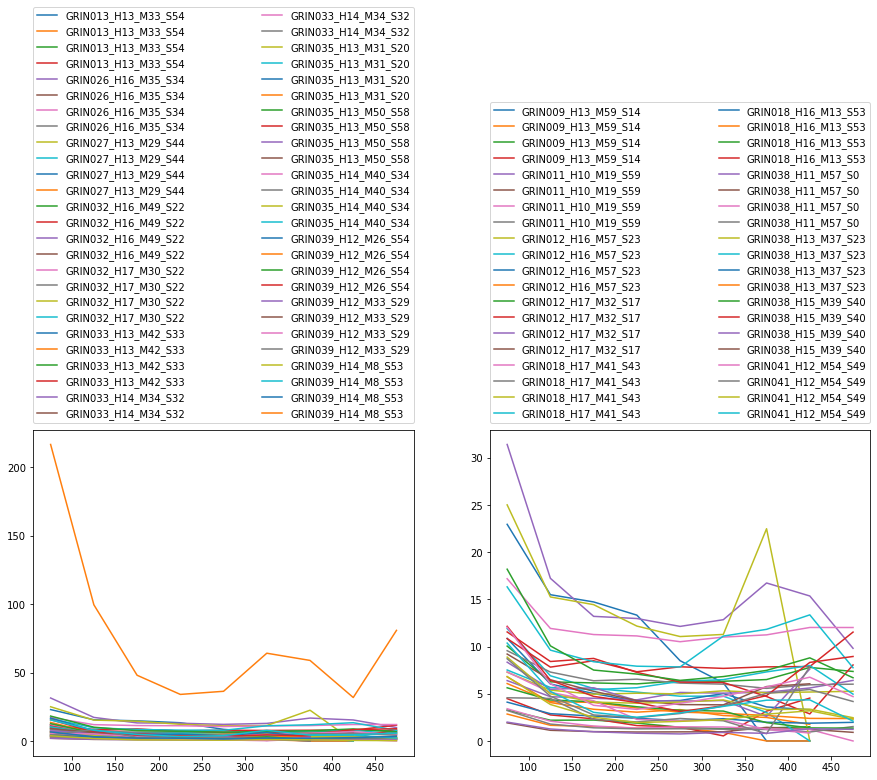

In [34]:
## individual sessions 
fig = plt.figure()
plt.subplot(1, 2, 1)

for session in range(len(genotype_compiled)):
    bin_vector = np.linspace(75, 475, len(genotype_compiled.iloc[session,:].values))
    plt.plot(bin_vector, genotype_compiled.iloc[session,:].values, label=list(genotype_compiled.index)[session][0])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

fig.set_size_inches(15, 6)

plt.subplot(1, 2, 2)

for session in range(len(genotype_compiled_ko)):
    bin_vector = np.linspace(75, 475, len(genotype_compiled_ko.iloc[session,:].values))
    plt.plot(bin_vector, genotype_compiled_ko.iloc[session,:].values, label=list(genotype_compiled_ko.index)[session][0])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

fig.set_size_inches(15, 6)
#fig.savefig('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/openfield_analysis/spatial_clustering/summary_figs/coactivity_data_bysession_sidebyside.pdf', transparent=True)
plt.show()

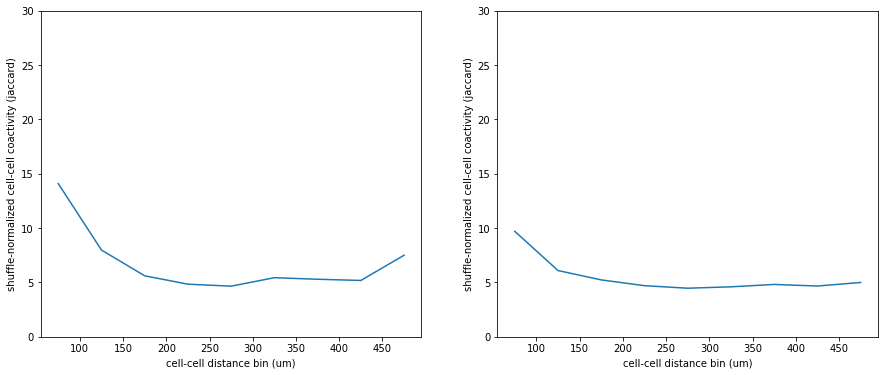

In [35]:
#plot average for genotype
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.plot(bin_vector, genotype_compiled.mean())
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((0,30))
#plot average for genotype
plt.subplot(1, 2, 2)
plt.plot(bin_vector, genotype_compiled_ko.mean())
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((0,30))


fig.set_size_inches(15, 6)
#fig.savefig('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/openfield_analysis/spatial_clustering/summary_figs/coactivity_data_sidebyside.pdf', transparent=True)
plt.show()

## compile ko data

## overlay ko and wt 

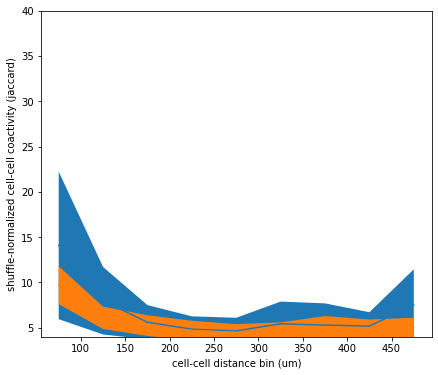

In [36]:
mean = genotype_compiled.mean()
mean_ko = genotype_compiled_ko.mean()
std_error = genotype_compiled.std()/math.sqrt(14)
std_error_ko = genotype_compiled_ko.std()/math.sqrt(10)
plt.plot(bin_vector, mean)
plt.plot(bin_vector, mean_ko)
plt.fill_between(bin_vector, mean-std_error, mean+std_error)
plt.fill_between(bin_vector, mean_ko-std_error_ko, mean_ko+std_error_ko)
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((4,40))
fig = plt.gcf()
fig.set_size_inches(7, 6)
#fig.savefig('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/openfield_analysis/spatial_clustering/summary_figs/combined_coactivity.pdf', transparent=True)
plt.show()

In [37]:
bin_vector

array([ 75., 125., 175., 225., 275., 325., 375., 425., 475.])

In [38]:
mean

0    14.091258
1     7.978129
2     5.610532
3     4.840123
4     4.656429
5     5.436425
6     5.293101
7     5.182564
8     7.504999
dtype: float64

In [39]:
mean_ko

0    9.699261
1    6.093444
2    5.233463
3    4.701692
4    4.469546
5    4.596905
6    4.817267
7    4.669479
8    4.997596
dtype: float64

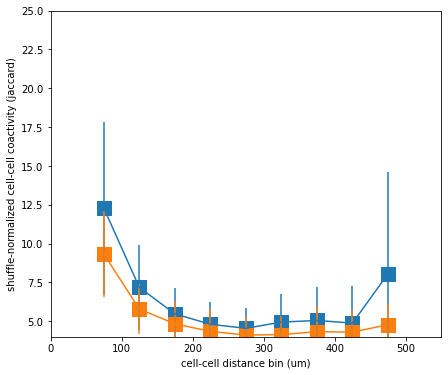

In [40]:
## averages by mouse
mean = wt_by_mouse.mean()
mean_ko = ko_by_mouse.mean()
std_error = wt_by_mouse.std()/math.sqrt(7)
std_error_ko = ko_by_mouse.std()/math.sqrt(6)
plt.scatter(bin_vector, mean, s=200, marker='s')
plt.scatter(bin_vector, mean_ko, s=200,  marker='s')
plt.errorbar(bin_vector, mean, yerr=std_error)
plt.errorbar(bin_vector, mean_ko, yerr=std_error_ko)
#plt.fill_between(bin_vector, mean-std_error, mean+std_error)
#plt.fill_between(bin_vector, mean_ko-std_error_ko, mean_ko+std_error_ko)
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((4,25))
ax.set_xlim((0,550))
fig = plt.gcf()
fig.set_size_inches(7, 6)
#fig.savefig('/projects/b1118/miniscope/analysis/marshall_2023_analysis/normalized_shuffled_jaccards_creon_by_mouse.pdf', transparent=True)
plt.show()

In [58]:
wt_by_mouse.to_csv('/projects/b1118/miniscope/analysis/marshall_2023_analysis/wt_normalized_shuffled_jaccards_by_mouse.csv')
ko_by_mouse.to_csv('/projects/b1118/miniscope/analysis/marshall_2023_analysis/ko_normalized_shuffled_jaccards_by_mouse.csv')

In [59]:
wt_by_mouse.values[0]

array([13.55  ,  8.4772,  8.195 ,  7.1268,  5.7801,  4.5038,  3.9499,
        5.3468,     nan])

In [60]:
bin_num=0
stats.kruskal(wt_by_mouse.values[bin_num], ko_by_mouse.values[bin_num], nan_policy='omit')

KruskalResult(statistic=1.1203703703703667, pvalue=0.289838717607506)

In [61]:
stats.mannwhitneyu(wt_by_mouse.values[3], ko_by_mouse.values[3])

MannwhitneyuResult(statistic=8.0, pvalue=0.002359099364057514)

In [62]:
wt_by_mouse

,,0,1,2,3,4,5,6,7,8
GRIN013,0,13.550000,8.477200,8.195000,7.126800,5.780100,4.503800,3.949900,5.34680,NaN
GRIN026,0,16.307000,9.382600,7.102500,6.666600,6.805700,7.016600,8.136900,7.44510,4.627300
GRIN027,0,13.759000,8.050700,6.547500,5.709200,5.809200,5.823400,4.974700,2.56190,NaN
GRIN032,0,15.891500,11.226550,10.773150,10.443000,10.490450,10.662650,10.894600,11.60110,11.837950
GRIN033,0,11.653650,8.317600,7.631950,6.082150,5.690800,5.691700,4.489900,7.52175,3.162000
GRIN035,0,18.282000,10.149733,7.468933,6.856267,6.895200,7.802333,8.043233,9.16240,6.882767
GRIN039,0,9.681267,5.705700,2.929633,2.492200,2.181433,2.526410,1.915667,1.42960,2.128100


In [63]:
ko_by_mouse

,,0,1,2,3,4,5,6,7,8
GRIN009,0,15.517000,10.92400,8.6667,7.307300,6.503000,6.037800,6.99080,6.822800,6.463400
GRIN011,0,24.341000,18.96600,16.3130,13.768000,13.199000,12.226000,12.22200,12.306000,11.567000
GRIN012,0,33.652500,22.69850,17.6830,15.715000,14.342000,12.296000,10.38685,10.224950,13.460000
GRIN018,0,13.541500,7.50625,6.6464,7.048400,6.618100,6.014350,5.45860,4.370700,9.032000
GRIN038,0,19.320267,10.36700,7.3874,5.925167,5.106367,4.259767,3.51630,3.868967,6.990333
GRIN041,0,5.397800,NaN,14.5740,NaN,NaN,NaN,NaN,NaN,NaN


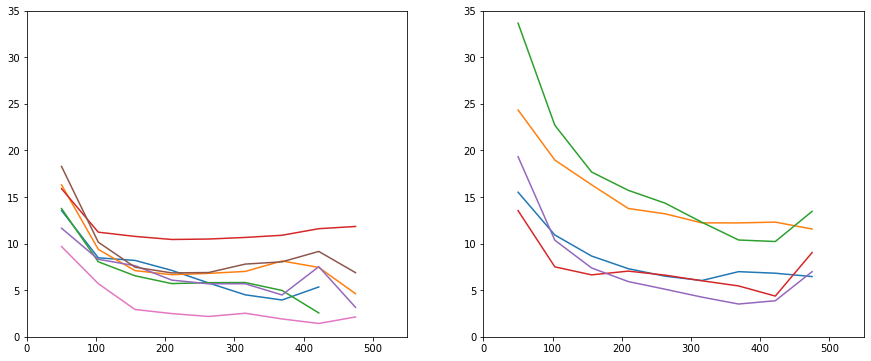

In [69]:
## individual mice 

## individual sessions 
fig = plt.figure()
plt.subplot(1, 2, 1)

for session in range(len(wt_by_mouse)):
    bin_vector = np.linspace(50, 475, len(wt_by_mouse.values[session]))
    plt.plot(bin_vector, wt_by_mouse.values[session])

ax = plt.gca()
ax.set_ylim((0,35))
ax.set_xlim((0,550))

plt.subplot(1, 2, 2)
    
for session in range(len(ko_by_mouse)):
    bin_vector = np.linspace(50, 475, len(ko_by_mouse.values[session]))
    plt.plot(bin_vector, ko_by_mouse.values[session])

ax = plt.gca()
ax.set_ylim((0,35))
ax.set_xlim((0,550))

fig.set_size_inches(15, 6)

In [70]:
def exponential(x, a, k, b):
    return a*np.exp(x*k) + b

In [106]:
## fit decay of individual curves 
fit_params_wt = {}
for session in range(len(wt_by_mouse)):
    x_array = bin_vector
    y_array_exp = wt_by_mouse.values[session]
    # remove nan values to fit decay 
    if len(np.argwhere(np.isnan(y_array_exp)))!=0:
        y_array_exp_nonan = np.delete(y_array_exp, np.argwhere(np.isnan(y_array_exp))[0])
        x_array_nonan = np.delete(x_array, np.argwhere(np.isnan(y_array_exp))[0])
        popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, x_array_nonan, 
                                                                  y_array_exp_nonan, 
                                                                  p0=[1,-0.5, 1])
    else:
        popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, x_array, 
                                                                  y_array_exp, 
                                                                  p0=[1,-0.5, 1])
    
    fit_params_wt[session]=popt_exponential
    
fit_params_ko = {}
for session in range(len(ko_by_mouse)-1):
    x_array = bin_vector
    y_array_exp = ko_by_mouse.values[session]
    # remove nan values to fit decay 
    if len(np.argwhere(np.isnan(y_array_exp)))!=0:
        y_array_exp_nonan = np.delete(y_array_exp, np.argwhere(np.isnan(y_array_exp))[0])
        x_array_nonan = np.delete(x_array, np.argwhere(np.isnan(y_array_exp))[0])
        popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, x_array_nonan, 
                                                                  y_array_exp_nonan, 
                                                                  p0=[1,-0.5, 1])
    else:
        popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, x_array, 
                                                                  y_array_exp, 
                                                                  p0=[1,-0.5, 1])
    
    fit_params_ko[session]=popt_exponential

In [107]:
fit_params_wt

{0: array([ 1.    , -0.5   ,  7.1162]),
 1: array([ 1.        , -0.5       ,  8.16558889]),
 2: array([ 1.     , -0.5    ,  6.65445]),
 3: array([ 1.        , -0.5       , 11.53566111]),
 4: array([ 1.    , -0.5   ,  6.6935]),
 5: array([ 1.        , -0.5       ,  9.06031852]),
 6: array([ 1.        , -0.5       ,  3.44333444])}

In [108]:
fit_params_ko

{0: array([ 1.    , -0.5   ,  8.3592]),
 1: array([ 1.        , -0.5       , 14.98977778]),
 2: array([ 1.        , -0.5       , 16.71764444]),
 3: array([ 1.        , -0.5       ,  7.35958889]),
 4: array([ 1.        , -0.5       ,  7.41572965])}